In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from utils.model import pipeline_model
from utils.preprocessing import pipeline_data
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

In [2]:
raw_csv_path = 'data/data/out_of_time/raw/raw_asesor.csv'

In [3]:
metrics = {}

df = pipeline_data.load_data(raw_csv_path)
df = pipeline_data.preprocessing(df)
df = pipeline_data.impute_cols(df)
df = pipeline_data.feature_eng(df)
cosechas = sorted(df['Cosecha_Liquidacion'].unique())[-6:]
for i in cosechas:
    output_parquet = f'./data/data/out_of_time/output/df_clean_{i}.parquet'
    path_to_model = f'data/model/model/out_of_time/trained_model_{i}.pickle'
    path_to_preds = f'./data/data/out_of_time/output/preds/df_preds_{i}.parquet'
    
    df_cosecha = df[df['Cosecha_Liquidacion'] <= i].reset_index(drop=True)
    y_true = df[df['Cosecha_Liquidacion'].isin([i])]
    y_true = y_true['Renuncio']
    
    pipeline_data.dump_data(df_cosecha, output_parquet)
    # Modeling
    df_model = pipeline_model.load_data(output_parquet)
    df_model = pipeline_model.preprocess(df_model)
    pipeline_model.training(df_model, path_to_model)
    df_proba = pipeline_model.inference(path_to_model, path_to_preds, output_parquet)
    y_pred = df_proba['Probability']
    y_scores = df_proba['y Scores']
    
    metrics[i] = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Classification Report':pd.DataFrame(classification_report(y_true, y_pred, output_dict=True)).transpose(),
        'ROC AUC': roc_auc_score(y_true, y_scores)
    }

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/mnt/Data/DS4A/app/utils/model/pipeline_model.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preds['Cosech

In [4]:
acc = [metrics[i]['Accuracy'] for i in cosechas]
roc_auc = [metrics[i]['ROC AUC'] for i in cosechas]

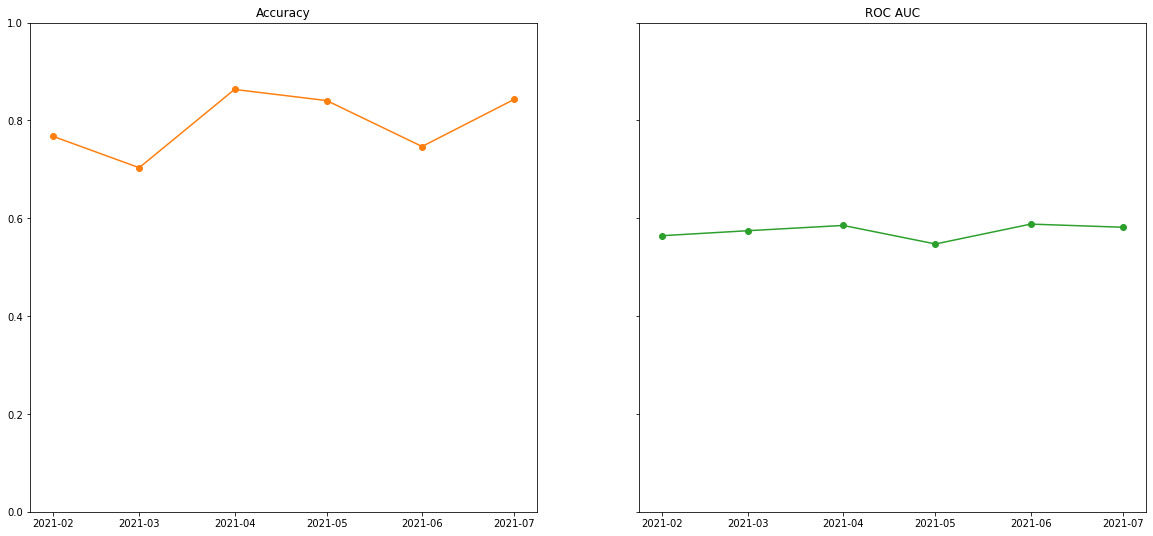

In [5]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey = True, figsize=(20,9))

axes[0].plot(cosechas, acc, 'o-', color='C1')
axes[1].plot(cosechas, roc_auc, 'o-', color='C2')

axes[0].set_title('Accuracy')
axes[1].set_title('ROC AUC')

axes[0].set_ylim(0,1)
axes[1].set_ylim(0,1)

plt.show()

In [6]:
for i in cosechas:
    print(f'Model trained up to {str(i)[:10]}')
    print(metrics[i]['Classification Report'])
    print()

Model trained up to 2021-02-01
              precision    recall  f1-score     support
0              0.943723  0.801471  0.866799  272.000000
1              0.052632  0.187500  0.082192   16.000000
accuracy       0.767361  0.767361  0.767361    0.767361
macro avg      0.498177  0.494485  0.474495  288.000000
weighted avg   0.894218  0.767361  0.823210  288.000000

Model trained up to 2021-03-01
              precision    recall  f1-score     support
0              0.934579  0.727273  0.817996  275.000000
1              0.127907  0.440000  0.198198   25.000000
accuracy       0.703333  0.703333  0.703333    0.703333
macro avg      0.531243  0.583636  0.508097  300.000000
weighted avg   0.867357  0.703333  0.766346  300.000000

Model trained up to 2021-04-01
              precision    recall  f1-score     support
0              0.934783  0.918149  0.926391  281.000000
1              0.041667  0.052632  0.046512   19.000000
accuracy       0.863333  0.863333  0.863333    0.863333
macro avg